## Problem:

[a] Use the Iris dataset from `scikit-learn` and inspect its structure. Print out some rows in the dataset to show the available features.

[b] Split the data into train and test sets. Then train a decision tree using the entropy criterion.

[c] Visualize the decision tree with `matplotlib`.

[d] Evaluate you decision tree model. Output the performace matrices - Precision, Recall and F1-score.

*Hint: use the `sklearn` library*

```python
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
```



---

In [4]:
# [a] Inspect the Iris dataset structure and print some rows
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
print('Features:', iris.feature_names)
display(df.head())

Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
# [b] Split data and train a decision tree (entropy criterion)
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X = df[iris.feature_names]
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf.fit(X_train, y_train)

,criterion,'entropy'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


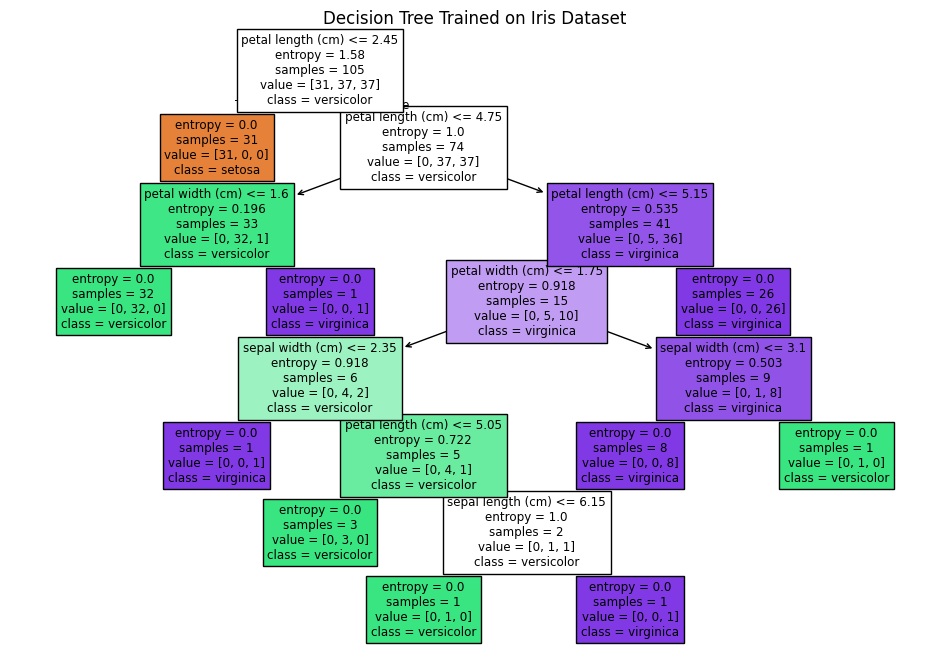

In [6]:
# [c] Visualize the decision tree with matplotlib
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(12,8))
plot_tree(clf, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.title('Decision Tree Trained on Iris Dataset')
plt.show()

In [7]:
# [d] Evaluate the decision tree model: Precision, Recall, F1-score
from sklearn.metrics import classification_report

y_pred = clf.predict(X_test)
report = classification_report(y_test, y_pred, target_names=iris.target_names)
print('Classification Report:')
print(report)

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       0.93      1.00      0.96        13
   virginica       1.00      0.92      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45

